In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pokemons_df = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')
del pokemons_df['#']
pokemons_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
print(pokemons_df.isna().sum())
pokemons_df.describe()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
print('liczba legendarnych pokemonów w zbiorze:', pokemons_df[pokemons_df['Legendary']].Legendary.count())
print('podzial na legendarne i nie~ pokemony w pierwszych 100 z najwyzsza suma statystyk:')
true, false = pokemons_df.sort_values('Total', ascending=False).iloc[:100].Legendary.value_counts()
print(f'Legendarne: {true}\nnie legendarne: {false}')

liczba legendarnych pokemonów w zbiorze: 65
podzial na legendarne i nie~ pokemony w pierwszych 100 z najwyzsza suma statystyk:
Legendarne: 53
nie legendarne: 47


In [ ]:
pokemons_df.sort_values('Total', ascending=False)[pokemons_df.Total>=700]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
712,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
409,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False


In [ ]:
pokemons_leg_df = pokemons_df[pokemons_df.Legendary]
pokemons_no_df = pokemons_df[~pokemons_df.Legendary]
print('Najslabszy legendarny:\n')
pokemons_leg_df.sort_values('Total').iloc[0]

Najslabszy legendarny:



Name          Articuno
Type 1             Ice
Type 2          Flying
Total              580
HP                  90
Attack              85
Defense            100
Sp. Atk             95
Sp. Def            125
Speed               85
Generation           1
Legendary         True
Name: 156, dtype: object

## Ilość legendarnych pokemonów w każdej z generacji

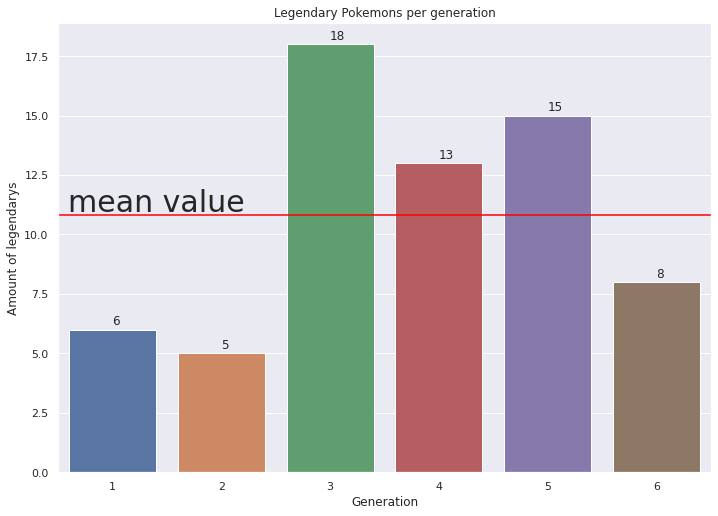

In [ ]:
legendary_per_gen = pokemons_leg_df.groupby('Generation').count().Legendary

sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x=legendary_per_gen.index, y=legendary_per_gen)
g.axhline(legendary_per_gen.mean(), color='red')
g.set(ylabel="Amount of legendarys")
plt.title("Legendary Pokemons per generation")
plt.text(0.4, legendary_per_gen.mean()+.5, 'mean value', fontsize=30, va='center', ha='center')
for i, row in enumerate(legendary_per_gen):
  g.text(i, row+.2, row)
plt.show()

## Porównanie średnich statystyk pokemonów legendarnych ze zwykłymi

In [ ]:
mean_stats_leg = pokemons_leg_df.mean() 
mean_stats_no = pokemons_no_df.mean() 
mean_stats = pd.DataFrame([mean_stats_no, mean_stats_leg])
mean_stats.replace({'Legendary':{True:'Legendary', False:'Normal'}}, inplace=True)
del mean_stats['Generation']
print("Tabela:")
mean_stats

Tabela:


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,Normal
1,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,Legendary


Wykres puktowy:



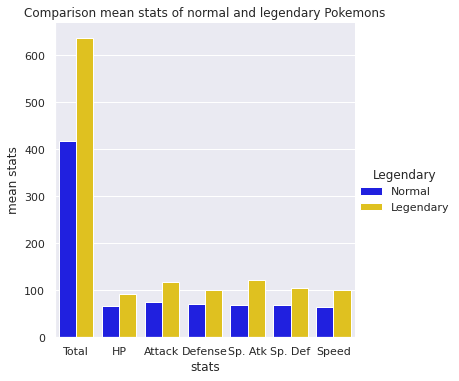

In [ ]:
mean_melt = pd.melt(mean_stats, id_vars='Legendary', var_name="stats", value_name='mean stats')

colors = ["#0000FF", "#FFD700"]
customPalette = sns.set_palette(sns.color_palette(colors))
g=sns.catplot(x='stats', y='mean stats',data=mean_melt, kind='bar', hue='Legendary', palette=customPalette)
plt.title("Comparison mean stats of normal and legendary Pokemons")
print("Wykres puktowy:\n")
plt.show()
None

In [ ]:
# średnia przewaga legendarnych wyrażona w % nad średnim normlanym
print("Przewaga w % na korzyść średnich statytyk dla legendarnych pokemonów:\n")
mean_stats.iloc[1,1:-1]/mean_stats.iloc[0,1:-1]*100-100

Przewaga w % na korzyść średnich statytyk dla legendarnych pokemonów:



HP           38.04
Attack      54.193
Defense    39.2715
Sp. Atk    78.4905
Sp. Def    53.7735
Speed      53.0569
dtype: object

## Suma występowań każdego z typów umiejętności/żywiołów

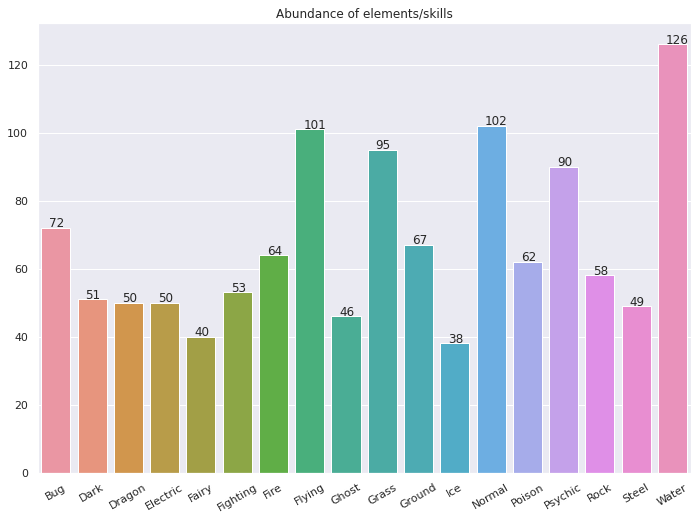

In [ ]:
elements = pokemons_df['Type 1'].value_counts()+pokemons_df['Type 2'].value_counts()
plt.title('Abundance of elements/skills')
plt.xticks(rotation=30)
g=sns.barplot( x= elements.index, y=elements)
for i, row in enumerate(elements):
  g.text(i-.18, row+.2, row)

## Wyświetlenie pokemonów z najwyższą wartością w każdej ze statystyk wraz z podkreśleniem konkretnej komórki

In [ ]:
pokemons_df.iloc[pokemons_df.iloc[:,4:10].idxmax()].style.highlight_max(color='red', subset=['Total','HP','Attack',	'Defense','Sp. Atk','Sp. Def',	'Speed'])

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,nan,540,255,10,10,75,135,55,2,False
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
224,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
164,MewtwoMega Mewtwo Y,Psychic,nan,780,106,150,70,194,120,140,1,True
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
431,DeoxysSpeed Forme,Psychic,nan,600,50,95,90,95,90,180,3,True
